In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# 1. Import Libraries
**Import necessary libraries (pandas, numpy, matplotlib, seaborn, scikit-learn, etc.).******


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder 

 

# 2. Load and Explore Dataset
**Load the dataset and display basic properties (shape, data types, etc.).
Describe the meaning of each feature/column.******


In [3]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 3. Check for Missing Values
**Identify missing values in the dataset.
Visualize missing data using a heatmap******.


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

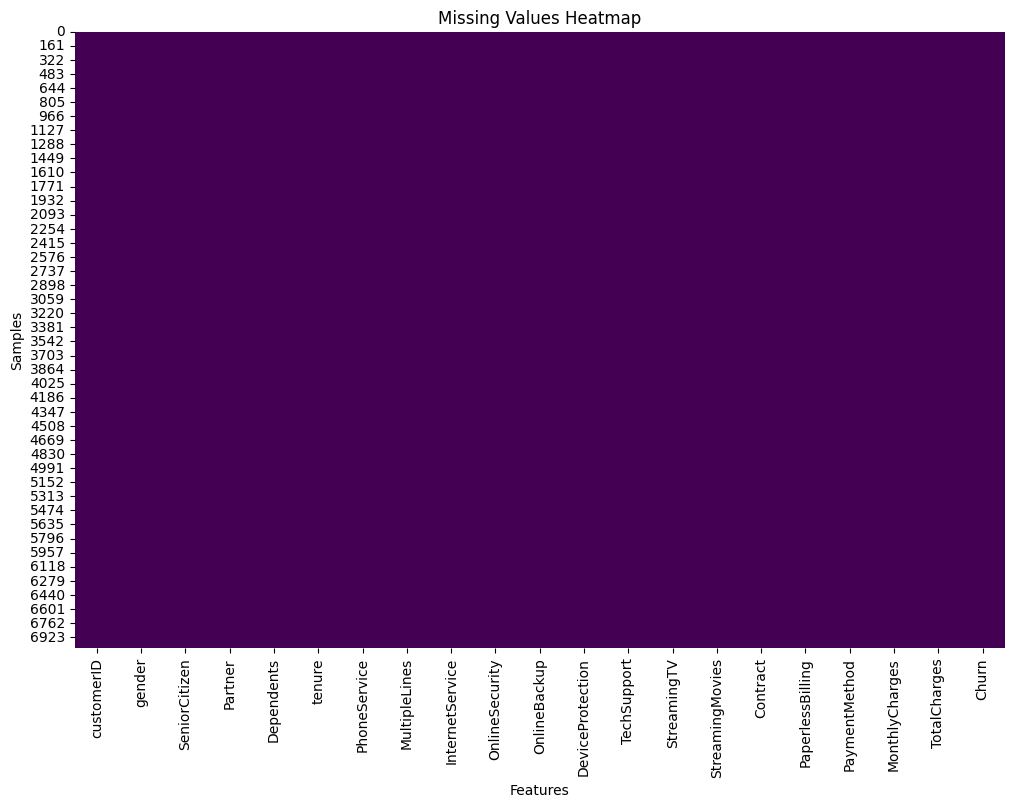

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

# 4. Analyze Null and Unique Values
**Identify columns with null values.
Analyze the number of unique values in each column.******


In [11]:
null_columns = df.columns[df.isnull().any()].tolist()
print("Columns with null values:", null_columns)


Columns with null values: []


In [12]:
unique_counts = df.nunique()
print("\nNumber of unique values in each column:")
print(unique_counts)


Number of unique values in each column:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


# 5. Detect and Handle Duplicated Values
**Check for duplicated rows in the dataset.
Remove duplicates if found.******


In [13]:
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
num_duplicates


0

In [14]:

null_columns = df.columns[df.isnull().any()].tolist()
null_columns


[]

# 7. Perform Data Binning
**Create bins for continuous variables ******


In [15]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

monthly_bins = [0, 30, 60, 90, 120, 150]
monthly_labels = ['0-30', '30-60', '60-90', '90-120', '120+']
df['MonthlyCharges_Binned'] = pd.cut(df['MonthlyCharges'], bins=monthly_bins, labels=monthly_labels, right=False)

total_bins = [0, 500, 1000, 1500, 2000, 2500]
total_labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000+']
df['TotalCharges_Binned'] = pd.cut(df['TotalCharges'], bins=total_bins, labels=total_labels, right=False)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Binned,TotalCharges_Binned
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-30,0-500
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,30-60,1500-2000
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,30-60,0-500
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,30-60,1500-2000
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,60-90,0-500


# 9. Data Filtering
**Remove irrelevant columns or rows that don't contribute to the analysis.******


In [16]:
columns_to_drop = ['customerID'] 
df.drop(columns=columns_to_drop, inplace=True)
df.dropna(subset=['Churn'], inplace=True)
df.drop_duplicates(inplace=True)
print("Final shape: ", df.shape)

print(df.head())

Final shape:  (7021, 22)
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1

# 10. Detect Outliers
**Detect outliers using methods like boxplots, Z-score, or IQR.******


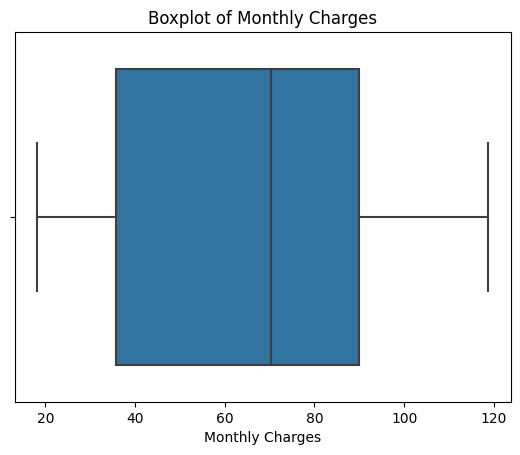

In [17]:
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.show()


In [18]:
# Step 3: Calculate the mean and standard deviation
mean = np.mean(df['MonthlyCharges'])
std = np.std(df['MonthlyCharges'])

# Step 4: Calculate the Z-Score
df['Z-Score'] = (df['MonthlyCharges'] - mean) / std
df['Z-Score']

0      -1.164135
1      -0.262811
2      -0.365914
3      -0.750058
4       0.194503
          ...   
7038    0.663458
7039    1.275428
7040   -1.172450
7041    0.317562
7042    1.356913
Name: Z-Score, Length: 7021, dtype: float64

In [19]:
data = df[df['Z-Score'] <= 3]
print(f"Here is the data without outliers:\n", data)

Here is the data without outliers:
       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0     No phone service             D

# 12. Correlation Analysis
**Create and analyze a correlation matrix to understand relationships between features and the target variable******



In [31]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
numeric_features = df[['MonthlyCharges', 'TotalCharges']]
correlation_matrix = numeric_features.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                 MonthlyCharges  TotalCharges
MonthlyCharges         1.00000       0.65054
TotalCharges           0.65054       1.00000


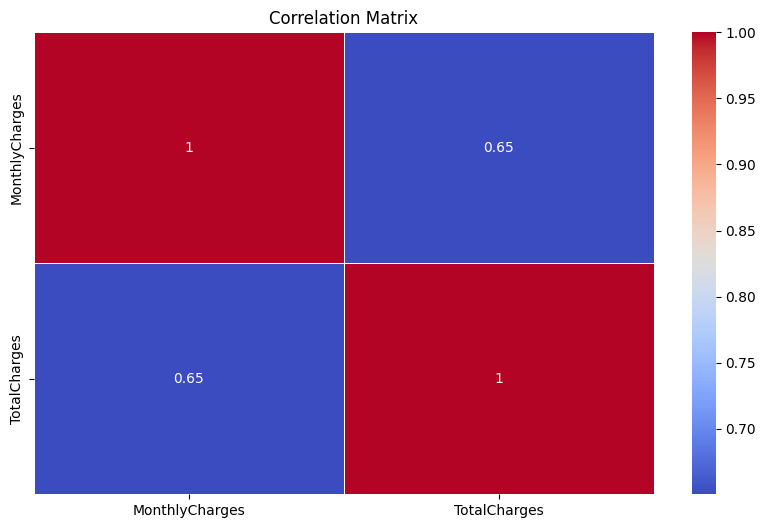

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 13. Feature Scaling
**Scale numerical features using techniques like Standardization or Min-Max Scaling.******


In [22]:
numeric_features = df[['MonthlyCharges', 'TotalCharges']]
standard_scaler = StandardScaler()
data_standardized = standard_scaler.fit_transform(numeric_features)
data_standardized = pd.DataFrame(data_standardized, columns=numeric_features.columns)
data_standardized.head()



,MonthlyCharges,TotalCharges
0,-1.164135,-0.997284
1,-0.262811,-0.176848
2,-0.365914,-0.962740
3,-0.750058,-0.198355
4,0.194503,-0.943549


In [23]:
min_max_scaler = MinMaxScaler()
data_minmax_scaled = min_max_scaler.fit_transform(numeric_features)
data_minmax_scaled = pd.DataFrame(data_minmax_scaled, columns=numeric_features.columns)
data_minmax_scaled.head()

,MonthlyCharges,TotalCharges
0,0.115423,0.001275
1,0.385075,0.215867
2,0.354229,0.010310
3,0.239303,0.210241
4,0.521891,0.015330


# 15. Feature Encoding
**Encode categorical variables using One-Hot Encoding or Label Encoding.******


In [24]:
ohe = OneHotEncoder()
ohe.fit_transform(df[['gender']]).toarray()

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [25]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MonthlyCharges_Binned',
       'TotalCharges_Binned', 'Z-Score'],
      dtype='object')

# 16. Data Visualization
**Create visualizations (scatter plots, histograms, boxplots, etc.) to explore the relationships between key features and TotalCharges .******


Text(0, 0.5, 'Total Charges')

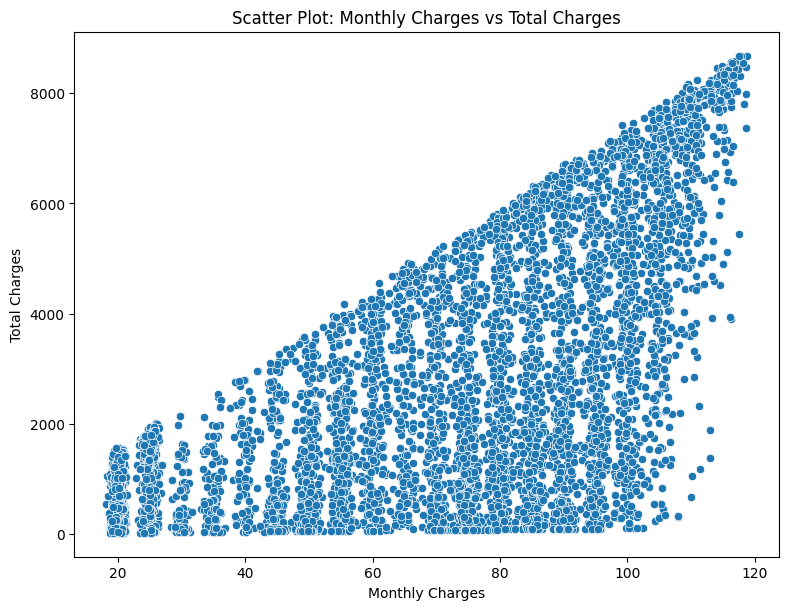

In [26]:
# scatter plot
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title('Scatter Plot: Monthly Charges vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

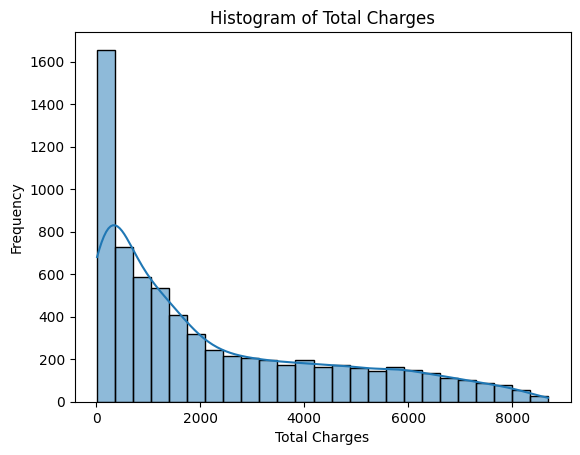

In [27]:
# Histogram
sns.histplot(df['TotalCharges'] ,kde=True)
plt.title('Histogram of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')


Text(0, 0.5, 'Total Charges')

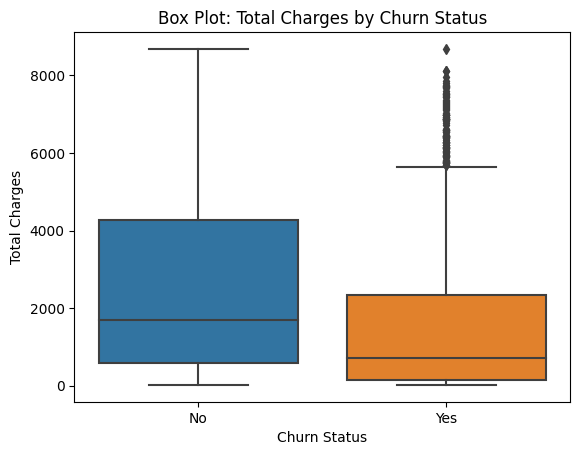

In [28]:
# Box Plot
sns.boxplot(x='Churn', y='TotalCharges', data=data)
plt.title('Box Plot: Total Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Total Charges')

In [29]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
data.dropna(subset=['TotalCharges', 'MonthlyCharges'], inplace=True)
X = data[['MonthlyCharges', 'tenure']]  
y = data['TotalCharges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred




array([6061.6953425 ,  399.65451571,  785.97429244, ..., 1482.97953434,
       5643.04824425, 2829.11639394])

In [30]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae)
r2



590.3626459241466


0.8958819212098798